In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

raw_file = Path("C:\\DataAnalystTraining\\Energy-Portfolio\\Data\\Raw\\uk_electricity.csv")
raw_file.exists(), raw_file

(True,
 WindowsPath('C:/DataAnalystTraining/Energy-Portfolio/Data/Raw/uk_electricity.csv'))

In [3]:
df = pd.read_csv(raw_file)
df.shape, df.head()

((2592000, 2),
                    dtm       f
 0  2025-11-01 00:00:00  49.966
 1  2025-11-01 00:00:01  49.964
 2  2025-11-01 00:00:02  49.967
 3  2025-11-01 00:00:03  49.964
 4  2025-11-01 00:00:04  49.965)

In [4]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.columns

Index(['dtm', 'f'], dtype='object')

In [8]:
dt_candidates = [c for c in df.columns if any(k in c for k in ["date", "time", "timestamp", "settlement", "period"])]
dt_candidates

[]

In [11]:
list(enumerate(df.columns))
df.head(3)

,dtm,f
0,2025-11-01 00:00:00,49.966
1,2025-11-01 00:00:01,49.964
2,2025-11-01 00:00:02,49.967


In [12]:
import pandas as pd

dt_scores = []
for c in df.columns:
    s = pd.to_datetime(df[c], errors="coerce")
    score = s.notna().mean()
    if score > 0.7:
        dt_scores.append((c, score))

sorted(dt_scores, key=lambda x: x[1], reverse=True)[:10]

[('dtm', np.float64(1.0)), ('f', np.float64(1.0))]

In [13]:
dt_col = "dtm"
metric_col = "f"

df[dt_col] = pd.to_datetime(df[dt_col], errors="coerce")
df[metric_col] = pd.to_numeric(df[metric_col], errors="coerce")

df = df.dropna(subset=[dt_col, metric_col]).sort_values(dt_col)

df.head()

,dtm,f
0,2025-11-01 00:00:00,49.966
1,2025-11-01 00:00:01,49.964
2,2025-11-01 00:00:02,49.967
3,2025-11-01 00:00:03,49.964
4,2025-11-01 00:00:04,49.965


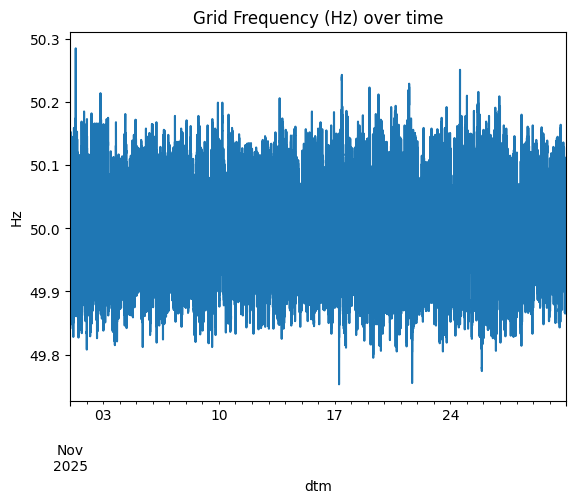

In [14]:
ax = df.set_index(dt_col)[metric_col].plot()
ax.set_title("Grid Frequency (Hz) over time")
ax.set_ylabel("Hz")
plt.show()

In [15]:
from pathlib import Path

Path("outputs/figures").mkdir(parents=True, exist_ok=True)
plt.gcf().savefig("outputs/figures/day3_frequency_timeseries.png", dpi=150, bbox_inches="tight")
"saved outputs/figures/day3_frequency_timeseries.png"

'saved outputs/figures/day3_frequency_timeseries.png'

<Figure size 640x480 with 0 Axes>

In [16]:
Path("data/processed").mkdir(parents=True, exist_ok=True)

out_path = Path("data/processed/uk_electricity_clean.csv")
df.to_csv(out_path, index=False)

out_path

WindowsPath('data/processed/uk_electricity_clean.csv')